In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)   
pd.set_option('display.max_colwidth', -1)  

In [2]:
#read data
data_path = ('/Users/markespina/Downloads/sentiment_labelled_sentences/yelp_labelled.txt'
            )
data_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
#rename columns
data_raw.columns=['review', 'sentiment']

In [3]:
keywords=['great', 'good', 'love', 'amazing', 'fantastic']
for key in keywords:
# chosen key words more likely to be end of senctence for positive reviews, adjust for pattern
    data_raw[str(key)] = data_raw.review.str.contains(
        ' ' + str(key),
        case=False
    )
data_raw["absence of 'not'"]=data_raw.review.str.contains('not' + ' ', case=False)==False
    

In [4]:
data_raw['char_count']=data_raw.review.apply(lambda x: len(x))

In [5]:
data_raw['char_count<100']=(data_raw['char_count']<100)

In [6]:
# count number of conditions met
for x in range(len(data_raw)):
    bool_cnt=0
    for elem in list(data_raw.T[x]):
        if elem==True:
            bool_cnt+=1
    data_raw.loc[x, 'condition_count>2']=bool_cnt


In [7]:
'''review meets 3 conditional features, most likely to be positive, 
   i.e has 3 keywords, is under 100 chars, doesn't contain 'not' and has one keyword etc...'''
data_raw['condition_count>2']=data_raw['condition_count>2']>2

In [8]:
data_raw

,review,sentiment,great,good,love,amazing,fantastic,absence of 'not',char_count,char_count<100,condition_count>2
0,Wow... Loved this place.,1,False,False,True,False,False,True,24,True,True
1,Crust is not good.,0,False,True,False,False,False,False,18,True,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,41,True,False
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,False,False,True,False,False,True,87,True,True
4,The selection on the menu was great and so were the prices.,1,True,False,False,False,False,True,59,True,True
5,Now I am getting angry and I want my damn pho.,0,False,False,False,False,False,True,46,True,False
6,Honeslty it didn't taste THAT fresh.),0,False,False,False,False,False,True,37,True,False
7,The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.,0,False,False,False,False,False,True,111,False,False
8,The fries were great too.,1,True,False,False,False,False,True,25,True,True
9,A great touch.,1,True,False,False,False,False,True,14,True,True


In [9]:
data_raw['sentiment'] = (data_raw['sentiment'] == 1)

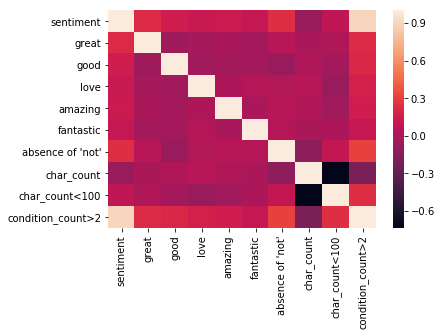

In [10]:
sns.heatmap(data_raw.corr())

In [15]:
data_raw

,review,sentiment,great,good,love,amazing,fantastic,absence of 'not',char_count,char_count<100,true_count>2
0,Wow... Loved this place.,True,False,False,True,False,False,True,24,True,True
1,Crust is not good.,False,False,True,False,False,False,False,18,True,False
2,Not tasty and the texture was just nasty.,False,False,False,False,False,False,False,41,True,False
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,True,False,False,True,False,False,True,87,True,True
4,The selection on the menu was great and so were the prices.,True,True,False,False,False,False,True,59,True,True
5,Now I am getting angry and I want my damn pho.,False,False,False,False,False,False,True,46,True,False
6,Honeslty it didn't taste THAT fresh.),False,False,False,False,False,False,True,37,True,False
7,The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.,False,False,False,False,False,False,True,111,False,False
8,The fries were great too.,True,True,False,False,False,False,True,25,True,True
9,A great touch.,True,True,False,False,False,False,True,14,True,True


In [13]:
data = data_raw[keywords+['char_count<100']+['condition_count>2']]
target = data_raw['sentiment']

In [14]:
data

,great,good,love,amazing,fantastic,char_count<100,condition_count>2
0,False,False,True,False,False,True,True
1,False,True,False,False,False,True,False
2,False,False,False,False,False,True,False
3,False,False,True,False,False,True,True
4,True,False,False,False,False,True,True
5,False,False,False,False,False,True,False
6,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False
8,True,False,False,False,False,True,True
9,True,False,False,False,False,True,True


In [15]:

bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 49
